In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd '/Users/shiv/Documents/datasets/black friday'

/Users/shiv/Documents/datasets/black friday


In [3]:
trainfile = pd.read_csv('train.csv')

In [4]:
testfile = pd.read_csv('test.csv')

In [5]:
trainfile.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [6]:
testfile.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [7]:
print(trainfile.shape)
print(testfile.shape)

(550068, 12)
(233599, 11)


# Exploratory Data Analysis-:

In [8]:
import seaborn as sns
import plotly.express as px

In [9]:
trainfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
testfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [11]:
trainfile.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [12]:
testfile.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,233599.0,1.003029e+06,1726.504968,1000001.0,1001527.0,1003070.0,1004477.0,1006040.0
Occupation,233599.0,8.085407e+00,6.521146,0.0,2.0,7.0,14.0,20.0
Marital_Status,233599.0,4.100702e-01,0.491847,0.0,0.0,0.0,1.0,1.0
Product_Category_1,233599.0,5.276542e+00,3.736380,1.0,1.0,5.0,8.0,18.0
Product_Category_2,161255.0,9.849586e+00,5.094943,2.0,5.0,9.0,15.0,18.0
Product_Category_3,71037.0,1.266945e+01,4.125944,3.0,9.0,14.0,16.0,18.0


In [13]:
trainfile.User_ID.nunique() 

5891

In [14]:
testfile.Product_ID.nunique()

3491

In [15]:
train_catcols = trainfile.select_dtypes(include='object')
train_catcols.columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [16]:
train_catcols.drop(['Product_ID'],axis=1,inplace=True)

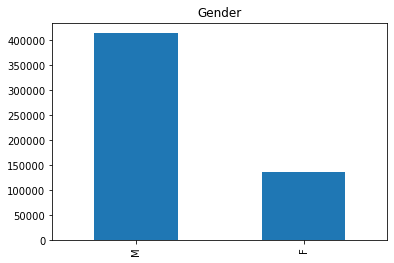

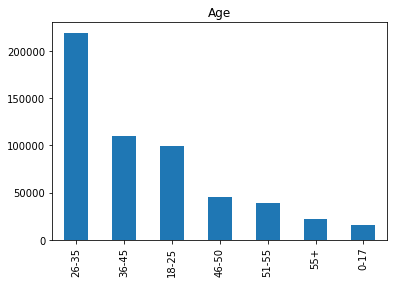

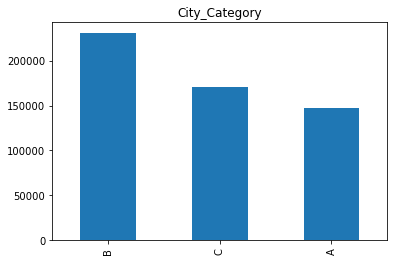

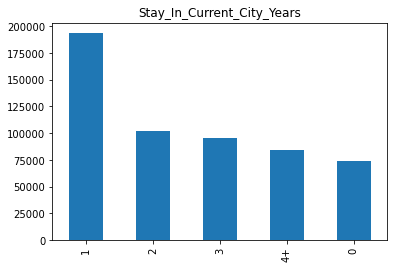

In [17]:
for i in train_catcols.columns:
    trainfile[i].value_counts().plot.bar()
    plt.title(i)
    plt.show();

- Males are heavy buyers
- 26-35 age-group peoples are in most buyers list
- City_category B have more buyers as compare to others
- New Ones which have 1 years is hevay buyer.

In [18]:
train_numcols = trainfile.select_dtypes(include=np.number)
train_numcols.drop(['User_ID'],axis=1,inplace=True)
train_numcols.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [19]:
train_numcols.head(2)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,0,3,NaN,NaN,8370
1,10,0,1,6.0,14.0,15200


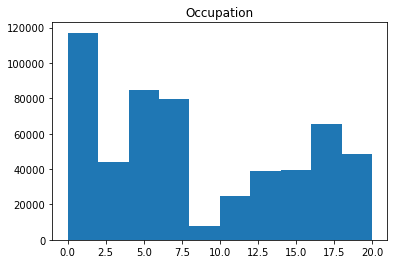

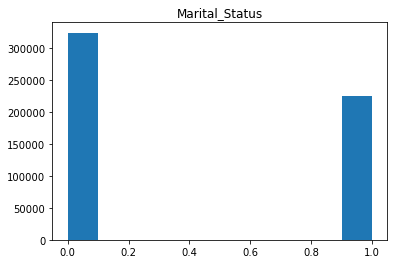

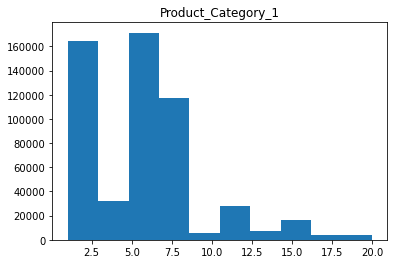

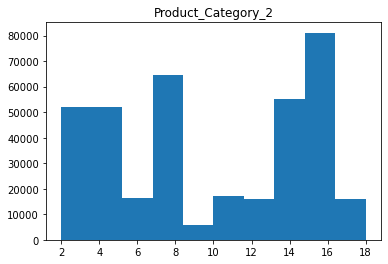

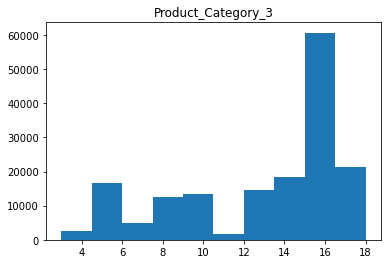

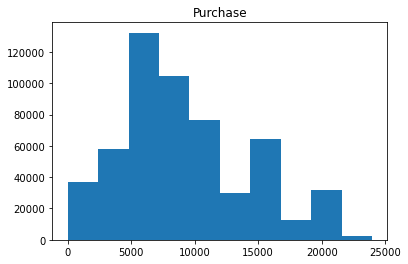

In [20]:
for i in train_numcols.columns:
    plt.hist(trainfile[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

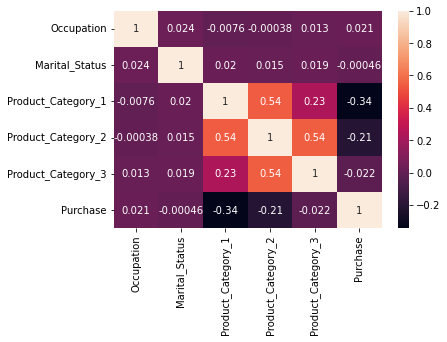

In [21]:
sns.heatmap(train_numcols.corr(),annot=True)

In [22]:
train_catcols.columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

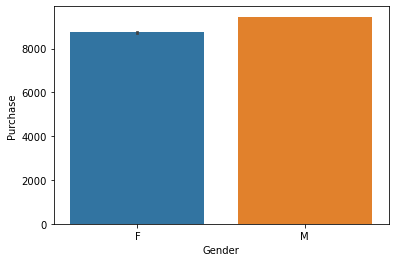

In [23]:
sns.barplot(data=trainfile,
           x='Gender',
           y='Purchase')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

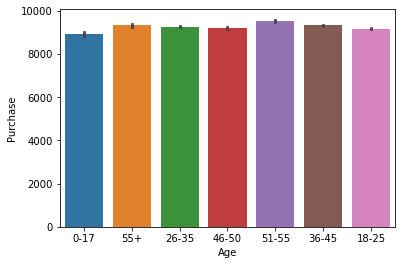

In [24]:
sns.barplot(data=trainfile,
           x='Age',
           y='Purchase')

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

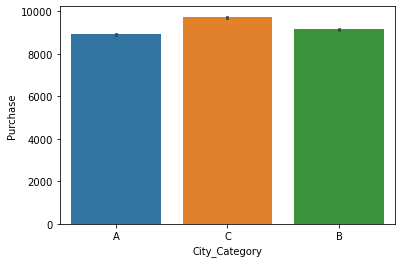

In [25]:
sns.barplot(data=trainfile,
           x='City_Category',
           y='Purchase')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

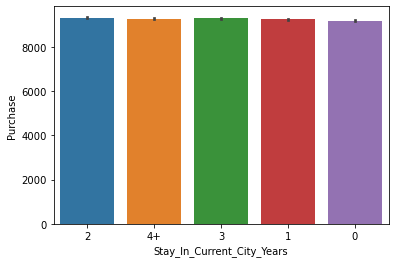

In [26]:
sns.barplot(data=trainfile,
           x='Stay_In_Current_City_Years',
           y='Purchase')

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

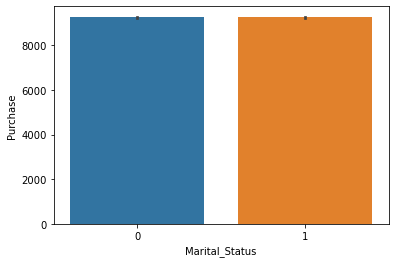

In [27]:
sns.barplot(data=trainfile,
           x='Marital_Status',
           y='Purchase')

- All Labels of catagorical values have shared equally mean of sales 

# Data Preprocessing-:

- Let's Make some more variables from the data given

In [28]:
trainfile["Product_Category_1_Count"] = trainfile.groupby(['Product_Category_1'])['Product_Category_1'].transform('count')
pc1_count_dict = trainfile.groupby(['Product_Category_1']).size().to_dict()
testfile['Product_Category_1_Count'] = testfile['Product_Category_1'].apply(lambda x:pc1_count_dict.get(x,0))

In [29]:
trainfile["Product_Category_2_Count"] = trainfile.groupby(['Product_Category_2'])['Product_Category_2'].transform('count')
pc2_count_dict = trainfile.groupby(['Product_Category_2']).size().to_dict()
testfile['Product_Category_2_Count'] = testfile['Product_Category_2'].apply(lambda x:pc2_count_dict.get(x,0))

In [30]:
trainfile["Product_Category_3_Count"] = trainfile.groupby(['Product_Category_3'])['Product_Category_3'].transform('count')
pc3_count_dict = trainfile.groupby(['Product_Category_3']).size().to_dict()
testfile['Product_Category_3_Count'] = testfile['Product_Category_3'].apply(lambda x:pc3_count_dict.get(x,0))

In [31]:
trainfile["Product_ID_Count"] = trainfile.groupby(['Product_ID'])['Product_ID'].transform('count')
productID_count_dict = trainfile.groupby(['Product_ID']).size().to_dict()
testfile['Product_ID_Count'] = testfile['Product_ID'].apply(lambda x:productID_count_dict.get(x,0))

trainfile["User_ID_Count"] = trainfile.groupby(['User_ID'])['User_ID'].transform('count')
userID_count_dict = trainfile.groupby(['User_ID']).size().to_dict()
testfile['User_ID_Count'] = testfile['User_ID'].apply(lambda x:userID_count_dict.get(x,0))

In [32]:
trainfile["User_ID_MinPrice"] = trainfile.groupby(['User_ID'])['Purchase'].transform('min')
userID_min_dict = trainfile.groupby(['User_ID'])['Purchase'].min().to_dict()
testfile['User_ID_MinPrice'] = testfile['User_ID'].apply(lambda x:userID_min_dict.get(x,0))

trainfile["User_ID_MaxPrice"] = trainfile.groupby(['User_ID'])['Purchase'].transform('max')
userID_max_dict = trainfile.groupby(['User_ID'])['Purchase'].max().to_dict()
testfile['User_ID_MaxPrice'] = testfile['User_ID'].apply(lambda x:userID_max_dict.get(x,0))

trainfile["User_ID_MeanPrice"] = trainfile.groupby(['User_ID'])['Purchase'].transform('mean')
userID_mean_dict = trainfile.groupby(['User_ID'])['Purchase'].mean().to_dict()
testfile['User_ID_MeanPrice'] = testfile['User_ID'].apply(lambda x:userID_mean_dict.get(x,0))


trainfile["Product_ID_MinPrice"] = trainfile.groupby(['Product_ID'])['Purchase'].transform('min')
productID_min_dict = trainfile.groupby(['Product_ID'])['Purchase'].min().to_dict()
testfile['Product_ID_MinPrice'] = testfile['Product_ID'].apply(lambda x:productID_min_dict.get(x,0))

trainfile["Product_ID_MaxPrice"] = trainfile.groupby(['Product_ID'])['Purchase'].transform('max')
productID_max_dict = trainfile.groupby(['Product_ID'])['Purchase'].max().to_dict()
testfile['Product_ID_MaxPrice'] = testfile['Product_ID'].apply(lambda x:productID_max_dict.get(x,0))

trainfile["Product_ID_MeanPrice"] = trainfile.groupby(['Product_ID'])['Purchase'].transform('mean')
productID_mean_dict = trainfile.groupby(['Product_ID'])['Purchase'].mean().to_dict()
testfile['Product_ID_MeanPrice'] = testfile['Product_ID'].apply(lambda x:productID_mean_dict.get(x,0))

In [33]:
pd.set_option('display.max_columns', 100)

In [34]:
testfile.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,140378,14134,0,936,14,481,19693,14747.714286,3933,19708,15781.118590
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,20213,26235,0,254,58,139,20278,10243.086207,3077,13714,11746.665354
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,150933,55108,0,142,223,24,20957,9728.744395,1734,8900,5731.338028


In [35]:
trainfile.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,20213,NaN,NaN,227,35,612,19219,9545.514286,2648,13716,11870.863436
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,581,35,612,19219,9545.514286,3880,19701,16304.030981
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,3947,NaN,NaN,102,35,612,19219,9545.514286,343,1776,1237.892157


- Missing Value Imputation-:

In [36]:
trainfile.isnull().sum()/len(trainfile)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
Product_Category_1_Count       0.000000
Product_Category_2_Count      31.566643
Product_Category_3_Count      69.672659
Product_ID_Count               0.000000
User_ID_Count                  0.000000
User_ID_MinPrice               0.000000
User_ID_MaxPrice               0.000000
User_ID_MeanPrice              0.000000
Product_ID_MinPrice            0.000000
Product_ID_MaxPrice            0.000000
Product_ID_MeanPrice           0.000000
dtype: float64

In [37]:
testfile.isnull().sum()/len(testfile)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
Product_Category_1_Count       0.000000
Product_Category_2_Count       0.000000
Product_Category_3_Count       0.000000
Product_ID_Count               0.000000
User_ID_Count                  0.000000
User_ID_MinPrice               0.000000
User_ID_MaxPrice               0.000000
User_ID_MeanPrice              0.000000
Product_ID_MinPrice            0.000000
Product_ID_MaxPrice            0.000000
Product_ID_MeanPrice           0.000000
dtype: float64

In [38]:
trainfile.Product_Category_2.mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [39]:
testfile.Product_Category_2.mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [40]:
trainfile.Product_Category_3.mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [41]:
testfile.Product_Category_3.mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [42]:
trainfile.Product_Category_2_Count.mode()

0    64088.0
Name: Product_Category_2_Count, dtype: float64

In [43]:
testfile.Product_Category_2_Count.mode()

0    0
Name: Product_Category_2_Count, dtype: int64

In [44]:
trainfile.Product_Category_3_Count.mode()

0    32636.0
Name: Product_Category_3_Count, dtype: float64

In [45]:
testfile.Product_Category_3_Count.mode()

0    0
Name: Product_Category_3_Count, dtype: int64

In [46]:
#filling missing values in product categories 2 & 3 by by any constant number say 0
trainfile['Product_Category_2']=trainfile['Product_Category_2'].fillna(0)
testfile['Product_Category_2']=testfile['Product_Category_2'].fillna(0)

trainfile['Product_Category_3']=trainfile['Product_Category_3'].fillna(0)
testfile['Product_Category_3']=testfile['Product_Category_3'].fillna(0)

trainfile['Product_Category_2_Count']=trainfile['Product_Category_2_Count'].fillna(0)
testfile['Product_Category_2_Count']=testfile['Product_Category_2_Count'].fillna(0)

trainfile['Product_Category_3_Count']=trainfile['Product_Category_3_Count'].fillna(0)
testfile['Product_Category_3_Count']=testfile['Product_Category_3_Count'].fillna(0)

- Label Encoding-:

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
trainfile.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370,20213,0.0,0.0,227,35,612,19219,9545.514286,2648,13716,11870.863436
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,581,35,612,19219,9545.514286,3880,19701,16304.030981


In [50]:
testfile.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0,140378,14134,0,936,14,481,19693,14747.714286,3933,19708,15781.118590
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0,20213,26235,0,254,58,139,20278,10243.086207,3077,13714,11746.665354


In [51]:
trainfile['Age']=le.fit_transform(trainfile['Age'])
testfile['Age']=le.fit_transform(testfile['Age'])

trainfile['City_Category']=le.fit_transform(trainfile['City_Category'])
testfile['City_Category']=le.fit_transform(testfile['City_Category'])

trainfile['Stay_In_Current_City_Years']=le.fit_transform(trainfile['Stay_In_Current_City_Years'])
testfile['Stay_In_Current_City_Years']=le.fit_transform(testfile['Stay_In_Current_City_Years'])

trainfile['Gender']=trainfile['Gender'].map({'M':1, 'F':0})
testfile['Gender']=testfile['Gender'].map({'M':1, 'F':0})

In [52]:
trainfile.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370,20213,0.0,0.0,227,35,612,19219,9545.514286,2648,13716,11870.863436
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,140378,16466.0,18428.0,581,35,612,19219,9545.514286,3880,19701,16304.030981
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422,3947,0.0,0.0,102,35,612,19219,9545.514286,343,1776,1237.892157


In [53]:
testfile.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,0.0,140378,14134,0,936,14,481,19693,14747.714286,3933,19708,15781.118590
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,0.0,20213,26235,0,254,58,139,20278,10243.086207,3077,13714,11746.665354


In [54]:
trainfile.drop(['User_ID','Product_ID'],axis=1,inplace=True)
testfile.drop(['User_ID','Product_ID'],axis=1,inplace=True)

# Modeling-:

In [55]:
y = trainfile.Purchase
X = trainfile.drop('Purchase',axis=1)

In [56]:
y.head(3)

0     8370
1    15200
2     1422
Name: Purchase, dtype: int64

In [57]:
X.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,User_ID_MeanPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_ID_MeanPrice
0,0,0,10,0,2,0,3,0.0,0.0,20213,0.0,0.0,227,35,612,19219,9545.514286,2648,13716,11870.863436
1,0,0,10,0,2,0,1,6.0,14.0,140378,16466.0,18428.0,581,35,612,19219,9545.514286,3880,19701,16304.030981
2,0,0,10,0,2,0,12,0.0,0.0,3947,0.0,0.0,102,35,612,19219,9545.514286,343,1776,1237.892157


In [58]:
print(y.shape)
print(X.shape)

(550068,)
(550068, 20)


- Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
reg = LinearRegression()
reg_model = reg.fit(X,y)

In [61]:
reg_model.score(X,y)

0.7416421732714935

In [62]:
reg_model.coef_

array([-3.08057954e+02, -2.50534044e+00, -2.20919582e+00,  7.53910619e+01,
        6.37149371e+00, -3.65293414e+01,  2.03086124e+00, -4.62546122e+00,
       -1.12058683e+00,  8.46502086e-05,  4.43926788e-04, -1.65337853e-03,
       -1.54189165e-01,  7.38986801e-01, -6.15798763e-02, -3.02675788e-02,
        4.78271565e-01,  2.08131000e-03, -1.67187919e-02,  9.91986725e-01])

In [63]:
reg_model.feature_names_in_

array(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_Category_1_Count', 'Product_Category_2_Count',
       'Product_Category_3_Count', 'Product_ID_Count', 'User_ID_Count',
       'User_ID_MinPrice', 'User_ID_MaxPrice', 'User_ID_MeanPrice',
       'Product_ID_MinPrice', 'Product_ID_MaxPrice',
       'Product_ID_MeanPrice'], dtype=object)

In [64]:
reg_model_prediction = reg_model.predict(testfile)

In [65]:
# pd.DataFrame(reg_model_prediction).to_csv('Regression_analysis.csv')

- Random Forest-:

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
forest = RandomForestRegressor()
forest_model = forest.fit(X,y)

In [68]:
forest_model.score(X,y)

0.9662338750482424

In [84]:
forest_model_f_imp = forest_model.feature_importances_
print(forest_model_f_imp)

[0.00286929 0.00971386 0.01476984 0.00488714 0.00893427 0.00319663
 0.00202163 0.00724342 0.00465455 0.00196349 0.00722715 0.00461636
 0.01945002 0.02662171 0.02373722 0.02920715 0.05115301 0.01779365
 0.01799048 0.74194912]


In [85]:
forest_model_f_names = forest_model.feature_names_in_
print(forest_model_f_names)

['Gender' 'Age' 'Occupation' 'City_Category' 'Stay_In_Current_City_Years'
 'Marital_Status' 'Product_Category_1' 'Product_Category_2'
 'Product_Category_3' 'Product_Category_1_Count'
 'Product_Category_2_Count' 'Product_Category_3_Count' 'Product_ID_Count'
 'User_ID_Count' 'User_ID_MinPrice' 'User_ID_MaxPrice' 'User_ID_MeanPrice'
 'Product_ID_MinPrice' 'Product_ID_MaxPrice' 'Product_ID_MeanPrice']


In [140]:
Feature_data_forest = pd.DataFrame({'Features':forest_model_f_names,'Importance':forest_model_f_imp*100})

In [141]:
Feature_data_forest = Feature_data_forest.sort_values(['Importance'],ascending=False).reset_index(drop=True)

In [146]:
Feature_data_forest

,Features,Importance
0,Product_ID_MeanPrice,74.194912
1,User_ID_MeanPrice,5.115301
2,User_ID_MaxPrice,2.920715
3,User_ID_Count,2.662171
4,User_ID_MinPrice,2.373722
5,Product_ID_Count,1.945002
6,Product_ID_MaxPrice,1.799048
7,Product_ID_MinPrice,1.779365
8,Occupation,1.476984
9,Age,0.971386


In [147]:
plt.figure(figsize=(20,10))
px.bar(Feature_data_forest,
           x='Importance',
           y='Features')
# As we can see that Product_ID_Mean_Price have highest importance in forest model--

<Figure size 1440x720 with 0 Axes>

In [71]:
forest_model_predict = forest_model.predict(testfile)

In [72]:
# pd.DataFrame(forest_model_predict).to_csv('Random_Forest_solution_1.csv')

- Gradient Boosting-:

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
boost = GradientBoostingRegressor()
boost_model = boost.fit(X,y)

In [75]:
boost_model.score(X,y)

0.7523861344807922

In [76]:
boost_model_predict = boost_model.predict(testfile)

In [77]:
# pd.DataFrame(boost_model_predict).to_csv('Gradient_boosting_sol_2.csv')

- Xgboost_model-:

In [78]:
from xgboost import XGBRegressor

In [79]:
Xgb = XGBRegressor(n_estimators=2500,max_depth=4,learning_rate=0.01)

In [80]:
Xgb_model = Xgb.fit(X,y)

In [81]:
Xgb_model.score(X,y)

0.7602768792253143

In [82]:
Xgb_model_predict = Xgb_model.predict(testfile)

In [83]:
# pd.DataFrame(Xgb_model_predict).to_csv('Xgb_model_solution8.csv')

summary-:

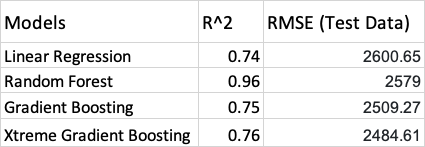

 I got 356 rank out of 26298 registered candidates